# Imports

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm

Matplotlib is building the font cache; this may take a moment.


Algorithm developed by Peter C. B. Phillips, Shu-Ping Shi, and Jun Yu from Yale University.

It's based on Backward-Sub-Augmented-DickerFuller-Test (BSADF).
You can get more information from paper which you can reach from Read.Me 

### Gather Data

In [4]:
ticker = 'BTC-USD'
start = '2020-05-01'
end = '2022-03-01'

prices = yf.download(ticker,start=start, end=end)['Close']

[*********************100%%**********************]  1 of 1 completed


### Algorithm

In [5]:
# Inputting parameters
r0 = int(len(prices)*0.1)
# Lags for the Augmented Dickey-Fuller Test
adf_lags = 3
# Crital value of the right-tailed ADF-Test from paper (%95)
crit = 1.49 #Finding using bootstraping in article
# Transforming Data - Make algorithm more robust log prices used
log_prices = np.array(np.log(prices))
delta_log_prices = log_prices[1:] - log_prices[:-1]
n = len(delta_log_prices)
BSADF = np.array([])
#Calculating ADF stats
for r2 in range(r0,n):
    ADFS = np.array([])
    for r1 in range(0, r2-r0+1):
        X_0 = log_prices[r1:r2+1]
        X = pd.DataFrame()
        X[0] = X_0
        for j in range(1, adf_lags+1):
            X[j] = np.append(np.zeros(j), delta_log_prices[r1:r2+1-j])
        X = np.array(X)
        y = delta_log_prices[r1:r2+1]
        reg = sm.OLS(y, sm.add_constant(X))
        res = reg.fit()
        ADFS = np.append(ADFS, res.params[1]/res.bse[1])
    BSADF = np.append(BSADF, max(ADFS))

### Visualisation

DatetimeIndex(['2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
               '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-12-17', '2020-12-18', '2020-12-19',
               '2020-12-20', '2020-12-22', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-02-06', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
      

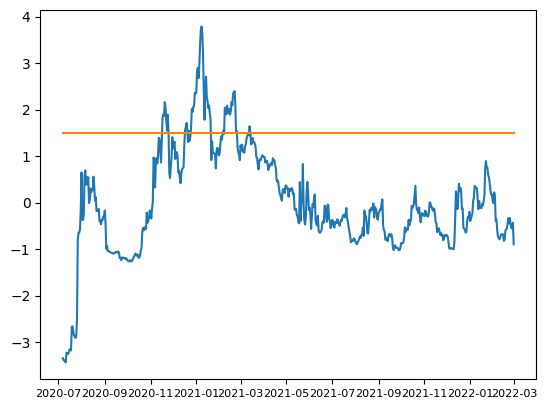

In [6]:
plt.rc('xtick',labelsize = 8)
plt.plot(prices.index[r0+1:],BSADF)
plt.plot(prices.index[r0+1:],np.ones(len(BSADF))*crit)
#printing dates when bubbles were detected
print(prices.index[r0+1:][BSADF > crit])

### Make function to able to use in once 

In [ ]:
def is_bubble(ticker, start, end, adf_lags=3, crit=1.49):
    """ 
    This function will try to detect bubbles accoring to ticker and given timeframe
    ticker = Ticker from yahoo finance
    start = Start date of data
    end = End date of data
    adf_lags = Lags for Augmented Dickey-Fuller Test -  3 as a default parameter
    crit = Crital value of the right-tailed ADF-Test - 1.49 as a default parameter
    """
    ticker = ticker
    start = start
    end = end

    prices = yf.download(ticker,start=start, end=end)['Close']

    r0 = int(len(prices)*0.1)
    adf_lags = adf_lags
    crit = crit
    log_prices = np.array(np.log(prices))
    delta_log_prices = log_prices[1:] - log_prices[:-1]
    n = len(delta_log_prices)
    BSADF = np.array([])
    for r2 in range(r0,n):
        ADFS = np.array([])
        for r1 in range(0, r2-r0+1):
            X_0 = log_prices[r1:r2+1]
            X = pd.DataFrame()
            X[0] = X_0
            for j in range(1, adf_lags+1):
                X[j] = np.append(np.zeros(j), delta_log_prices[r1:r2+1-j])
            X = np.array(X)
            y = delta_log_prices[r1:r2+1]
            reg = sm.OLS(y, sm.add_constant(X))
            res = reg.fit()
            ADFS = np.append(ADFS, res.params[1]/res.bse[1])
        BSADF = np.append(BSADF, max(ADFS))
    plt.rc('xtick',labelsize = 8)
    plt.plot(prices.index[r0+1:],BSADF)
    plt.plot(prices.index[r0+1:],np.ones(len(BSADF))*crit)
    print(prices.index[r0+1:][BSADF > crit])
    

[*********************100%%**********************]  1 of 1 completed


DatetimeIndex(['2022-10-07', '2022-10-12', '2022-10-13', '2022-10-14',
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
               '2022-10-21', '2022-10-24', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17'],
              dtype='datetime64[ns]', name='Date', freq=None)


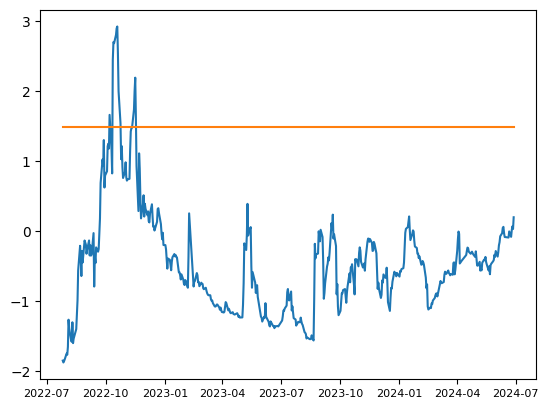

In [10]:
is_bubble('HEKTS.IS',start='2022-05-01',end='2024-07-01')